# The most important unsupervised learning technique: Clustering Model
# Let's build a clustering model with the live dataset.

**This dataset shows the number of comments, the number of shares and  variety of reactions  on a website.**

In [1]:
import pandas as pd
dataset = pd.read_csv('/kaggle/input/live-csv/Live (1).csv')
dataset.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


**Let's randomly determine the clustering number as 3.**

**After building the model, we will choose the appropriate clustering number.**

In [2]:
from sklearn .cluster import KMeans
model = KMeans(n_clusters = 3, n_init='auto')

In [3]:
model.fit(dataset)

KMeans(n_clusters=3, n_init='auto')

**After initializing the model we train it using the model.fit method.
We are ready to make predictions.**

In [4]:
labels = model.predict(dataset)

In [5]:
import numpy as np
np.unique(labels, return_counts=True)

(array([0, 1, 2], dtype=int32), array([4288, 2334,  428]))

* Since we set the number of clusters to 3, we have three labels.

**To check that the model performs best, we take a series of values of the set K.**

In [6]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
silhouettes = []
ks = list(range(2,12))
for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster,n_init='auto').fit(dataset)
    label = kmeans.labels_
    sil_coeff = silhouette_score(dataset, label, metric='euclidean')
    print("For n_cluster ={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    silhouettes.append(sil_coeff)


For n_cluster =2, The Silhouette Coefficient is 0.8188237721696822
For n_cluster =3, The Silhouette Coefficient is 0.8972493682244883
For n_cluster =4, The Silhouette Coefficient is 0.9106664962327088
For n_cluster =5, The Silhouette Coefficient is 0.8866768371183754
For n_cluster =6, The Silhouette Coefficient is 0.8421404750401401
For n_cluster =7, The Silhouette Coefficient is 0.8419421782294257
For n_cluster =8, The Silhouette Coefficient is 0.8369757672176514
For n_cluster =9, The Silhouette Coefficient is 0.6988111749341444
For n_cluster =10, The Silhouette Coefficient is 0.7523149983003534
For n_cluster =11, The Silhouette Coefficient is 0.6608483594433741


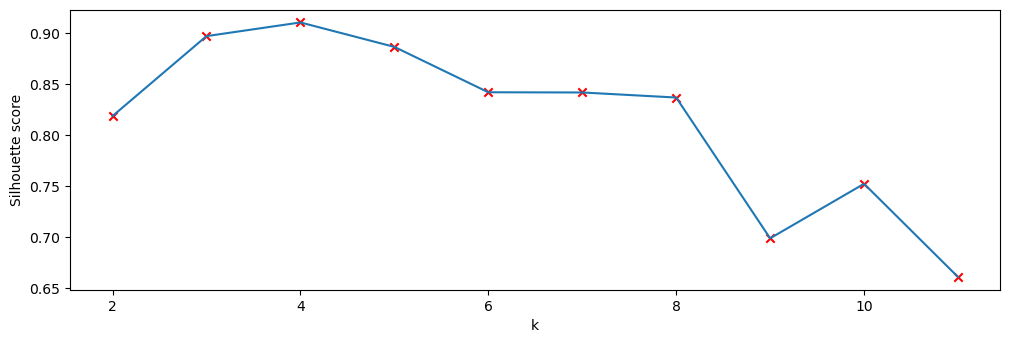

In [7]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.scatter(ks, silhouettes, marker='x', c='r') 
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('Silhouette score');

* The number of clusters where we get the highest value of the silhouette coefficient is 4.

**We change the clustering number to 4 for better results.**

In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4,n_init='auto')
model.fit(dataset)
labels = model.predict(dataset)
import numpy as np
np.unique(labels, return_counts = True)

(array([0, 1, 2, 3], dtype=int32), array([4288, 2334,  365,   63]))

In [9]:
dataset["labels"] = labels
dataset["labels"].value_counts()

0    4288
1    2334
2     365
3      63
Name: labels, dtype: int64

In [10]:
group_zero = dataset[dataset["labels"] == 0]['num_comments'].mean()
group_zero

0.0007619566531325948

In [11]:
group_one = dataset[dataset["labels"] == 1]['num_comments'].mean()
group_one

0.030608773182480054

In [12]:
group_two = dataset[dataset["labels"] == 2]['num_comments'].mean()
group_two

0.0017264581307471548

In [13]:
group_three = dataset[dataset["labels"] == 3]['num_comments'].mean()
group_three

0.00027148226290672723

* We found the average number of comments for each clustered group. We see that the average number of comments for each group is different.

* Therefore, according to the number of comments, we can find the most famous group among users.

* The most popular group is 1. Then in order: 2, 0, 3

**We can also see the average number of shares for each group**

In [14]:
group_zero = dataset[dataset["labels"] == 0]['num_shares'].mean()
group_zero

0.0007458736181824375

In [15]:
group_one = dataset[dataset["labels"] == 1]['num_shares'].mean()
group_one

0.033785031713235436

In [16]:
group_two = dataset[dataset["labels"] == 2]['num_shares'].mean()
group_two

0.0007473434899500528

In [17]:
group_three = dataset[dataset["labels"] == 3]['num_shares'].mean()
group_three

0.001284119566829822

* According to the number of shares, we see that the most popular group is again 1.

In [18]:
status_type = dataset[['status_type_photo', 'status_type_video', 'status_type_status']].idxmax(axis=1)
dataset = pd.concat([dataset['labels'], status_type.rename('status_type')], axis=1)

In [19]:
dataset.groupby(['labels', 'status_type'])['status_type'].count()

labels  status_type       
0       status_type_photo     4288
1       status_type_video     2334
2       status_type_status     365
3       status_type_photo       63
Name: status_type, dtype: int64

* We can say that there are only photographs in group 0.
* We can say that there is only video in group 1.

* It means that customers prefer to see photos of the product.
* Despite this, the most popular group among users was 1.

# **Thank you!!**